# Geomagnetic field computation
## installation
pip install geomagnetism

## for more information refer to:
https://github.com/Bertin-fap/geomagnetism-exemples/blob/master/geomagnetism_notes.pdf


In [1]:
import geomagnetism as geo
from pprint import pprint
height= 0.0
colatitude= 170.0
longitude= 240.0
Date={"mode":"dec","year":2020.0}

result = geo.B_components(longitude,colatitude,height,Date,referential="geodetic",
                                   file="WMM_2020.COF", SV=True)
pprint(result)

{'D': 69.3610564254094,
 'Dd': -0.09443459660526313,
 'F': 55120.604170372426,
 'Fd': -83.46403856734376,
 'H': 16853.75717045147,
 'Hd': 12.437071229468575,
 'I': -83.54187855308683,
 'Id': 0.041439649920506444,
 'X': 5940.575261950754,
 'Xd': 30.379259074100904,
 'Y': 15772.085984981284,
 'Yd': 1.8476378780095435,
 'Z': -52480.77622659876,
 'Zd': 91.65641129191947}


## benchmark with WMM test data 2020

In [2]:
index=0 # index >=0 and <12
Date, height, colatitude, longitude, WMM = geo.read_WWW_test_2020(8)
result = geo.B_components(longitude,colatitude,height,Date,referential="geodetic",
                                    file="WMM_2020.COF",SV=True)
print(f'Date: {Date["year"] } ')
print(f'longitude: {longitude } °')
print(f'colatitude: {colatitude } °')
print(f'height {height} m\n')
print("geomagnetism result")
pprint(result) 
print("geomagnetism WMM test value for 2020")
pprint(WMM)

Date: 2022.5 
longitude: 240 °
colatitude: 170 °
height 0 m

geomagnetism result
{'D': 69.1254060051065,
 'Dd': -0.09408553131003862,
 'F': 54912.07843465053,
 'Fd': -83.3563459190898,
 'H': 16884.992659453015,
 'Hd': 12.55121429759544,
 'I': -83.4315946800131,
 'Id': 0.04186855377459576,
 'X': 6016.523409636008,
 'Xd': 30.379259074100904,
 'Y': 15776.705079676305,
 'Yd': 1.8476378780095435,
 'Z': -52251.63519836896,
 'Zd': 91.65641129191947}
geomagnetism WMM test value for 2020
{'D (Deg)': 69.13,
 'Ddot\n(deg/yr)': -0.09,
 'F (nT)': 54912.1,
 'Fdot\n(nT/yr)': -83.4,
 'GV\n(Deg)': -50.87,
 'H (nT)': 16885.0,
 'Hdot\n(nT/yr)': 12.6,
 'I (Deg)': -72.09,
 'Idot\n(deg/yr)': 0.04,
 'X (nT)': 6016.5,
 'Xdot\n(nT/yr)': 30.4,
 'Y (nT)': 15776.7,
 'Ydot\n(nT/yr)': 1.8,
 'Z (nT)': -52251.6,
 'Zdot\n(nT/yr)': 91.7}


#  h and g coefficients
Reading of the experimental value of the coefficients $h_n^m$, $g_n^m$ versus year as well as their secular variation.

In [3]:
import geomagnetism as geo
file = "IGRF13.COF" # downloaded from https://www.ngdc.noaa.gov/IAGA/vmod/coeffs/igrf13coeffs.txt
dic_dic_h, dic_dic_g, dic_dic_SV_h, dic_dic_SV_g, dic_N, Years= geo.read_IGRF13_COF(file)
m=1
n=3
years="1965"
h = dic_dic_h[years][(m,n)]
print(f'Spherial harmonic coefficients h(m={m},n={n}) for year = {years} :{h}')

Spherial harmonic coefficients h(m=1,n=3) for year = 1965 :-404.0


In [4]:
file="FORTRAN_1900_1995.txt" # extracted from https://www.ngdc.noaa.gov/IAGA/vmod/igrf13.f
dic_dic_h,dic_dic_g,dic_N,Years = geo.read_fortran_DATA(file) 
m=1
n=3
years="1965"
h = dic_dic_h[years][(m,n)]
print(f'Spherial harmonic coefficients h(m={m},n={n}) for year = {years} :{h}')

Spherial harmonic coefficients h(m=1,n=3) for year = 1965 :-404.0


In [5]:
file="IGRF13coeffs.txt" # downloaded from https://www.ngdc.noaa.gov/IAGA/vmod/igrf.html
dic_dic_h,dic_dic_g,dic_dic_SV_h,dic_dic_SV_g,dic_N,Years=geo.read_IGRF13coeffs(file)
m=1
n=3
years="1965"
h = dic_dic_h[years][(m,n)]
print(f'Spherial harmonic coefficients h(m={m},n={n}) for year = {years} :{h}')

Spherial harmonic coefficients h(m=1,n=3) for year = 1965 :-404


In [6]:
year = "2020" #downloaded from https://www.ngdc.noaa.gov/geomag/WMM/wmm_ddownload.shtml
m=1
n=3
years="2020"
if year=="2015" or years=="2020":
    file="WMM_"+years+".COF"
    dic_dic_h,dic_dic_g,dic_dic_SV_h,dic_dic_SV_g,dic_N,Years=geo.read_WMM(file)
h = dic_dic_h[years][(m,n)]
g = dic_dic_g[years][(m,n)]
print(f'Spherial harmonic coefficients h(m={m},n={n}) for year = {years} :{h}')
print(f'Spherial harmonic coefficients g(m={m},n={n}) for year = {years} :{g}')

Spherial harmonic coefficients h(m=1,n=3) for year = 2020 :-82.2
Spherial harmonic coefficients g(m=1,n=3) for year = 2020 :-2381.0


# Geodetic to geocentric transformation relationship
### for more information refer to:
https://github.com/Bertin-fap/geomagnetism-exemples/blob/master/geomagnetism_notes.pdf


In [7]:
import geomagnetism as geo
import numpy as np

WGS84 = geo.geomagnetism.WGS84
h = 100_000 # in meters
geotetic_latitude = 80 # in degrees
r_geocentric,co_latitude_geocentric,delta = geo.geodetic_to_geocentric(WGS84, geotetic_latitude, h)
print(f'geocentric radius {r_geocentric:0.4f} m,\
\ngeocentric colatitude {co_latitude_geocentric*180/np.pi:0.4f}°\
\ndelta = {delta*180/np.pi:0.4f}°')

geocentric radius 6477497.3376 m,
geocentric colatitude 80.0646°
delta = 0.0646°


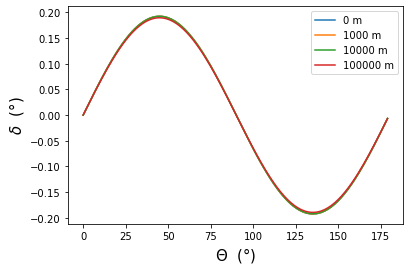

In [8]:
import geomagnetism as geo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Ellipsoid parameters: semi major axis in metres, reciprocal flattening.
GRS80 = geo.geomagnetism.GRS80
WGS84 = geo.geomagnetism.WGS84

hs = [0,1000,10000,100000]
colats=np.arange(0,180,1)

for h in hs:
    colat_geocentrics=[]
    for colat in colats:
        _,colat_geocentric,_ = geo.geodetic_to_geocentric(WGS84, colat, h )
        colat_geocentrics.append(colat_geocentric)
        
    plt.plot(colats,np.array(colat_geocentrics)*180/np.pi-colats,label=str(h)+" m")
    plt.xlabel('$\Theta$  (°)',size=15)
    plt.ylabel('$\delta$  (°)',size=15)
    plt.legend()

# Check the Schmidt quasi-normalization conditions:


In [9]:
'''Checks the orthogonality and normalization relations (2) of the associated Legendre polynomes 
using eithe the Schmidt normalization (3) or the Stacey normalization (4)'''
from scipy.integrate import dblquad
import numpy as np
import math
from scipy.special import lpmn

mode="Schimdt" # must be equal to "Stacey" or "Schimdt"
n=9           # stands for N
m=8            # stands for M
n_=9          # stands for n
m_=8           # stands for m

def CC(theta,phi):
    M,_=lpmn(m,n,np.cos(theta))
    M=M*Norm
    t1=M[m,n]*np.cos(m*phi)
    t2=M[m_,n_]*np.cos(m_*phi)
    return t1*t2*np.sin(theta)

def SS(theta,phi):
    M,_=lpmn(m,n,np.cos(theta))
    M=M*Norm
    t1=M[m,n]*np.sin(m*phi)
    t2=M[m_,n_]*np.sin(m_*phi)
    return t1*t2*np.sin(theta)

def CS(theta,phi):
    M,_=lpmn(m,n,np.cos(theta))
    M=M*Norm
    t1=M[m,n]*np.cos(m*phi)
    t2=M[m_,n_]*np.sin(m_*phi)
    return t1*t2*np.sin(theta)


if mode=="Stacey":
    Norm=geo.Norm_Stacey(m,n) 
elif mode=="Schimdt":
    Norm=geo.Norm_Schimdt(m,n)

ans1, err = dblquad(CC, 0, 2*np.pi,
                   lambda x: 0,
                   lambda x: np.pi)
ans2, err = dblquad(SS, 0, 2*np.pi,
                   lambda x: 0,
                   lambda x: np.pi)
ans3, err = dblquad(CS, 0, 2*np.pi,
                   lambda x: 0,
                   lambda x: np.pi)
print("mode :",mode,"N =",n," M =",m, "n =", n_ ,"m =",m_)
if mode=="Stacey":
    print("\nNumerical value CC  : ",ans1,"\nTheoritical value CC:",4*np.pi*(n==n_)*(m_==m))
    print("\nNumerical value SS  : ",ans2,"\nTheoritical value SS:",4*np.pi*(n==n_)*(m_==m)*(1-(m_==0)))
    print("\nNumerical value SC  : ",ans3, "\nTheoritical value SC:",0)
elif mode=="Schimdt":
    print("\nNumerical value CC  : ",ans1, "\nTheoritical value CC:",4*np.pi/(2*n+1)*(n==n_)*(m_==m))
    print("\nNumerical value SS  : ",ans2,"\nTheoritical value SS:",4*np.pi/(2*n+1)*(n==n_)*(m_==m)*(1-(m_==0)))
    print("\nNumerical value SC  : ",ans3, "\nTheoritical value SC:",0)

mode : Schimdt N = 9  M = 8 n = 9 m = 8

Numerical value CC  :  0.6613879270715354 
Theoritical value CC: 0.6613879270715354

Numerical value SS  :  0.6613879270715353 
Theoritical value SS: 0.6613879270715354

Numerical value SC  :  -2.9971125723710876e-16 
Theoritical value SC: 0


## Near pole development

Text(0, 0.5, 'Z (nT)')

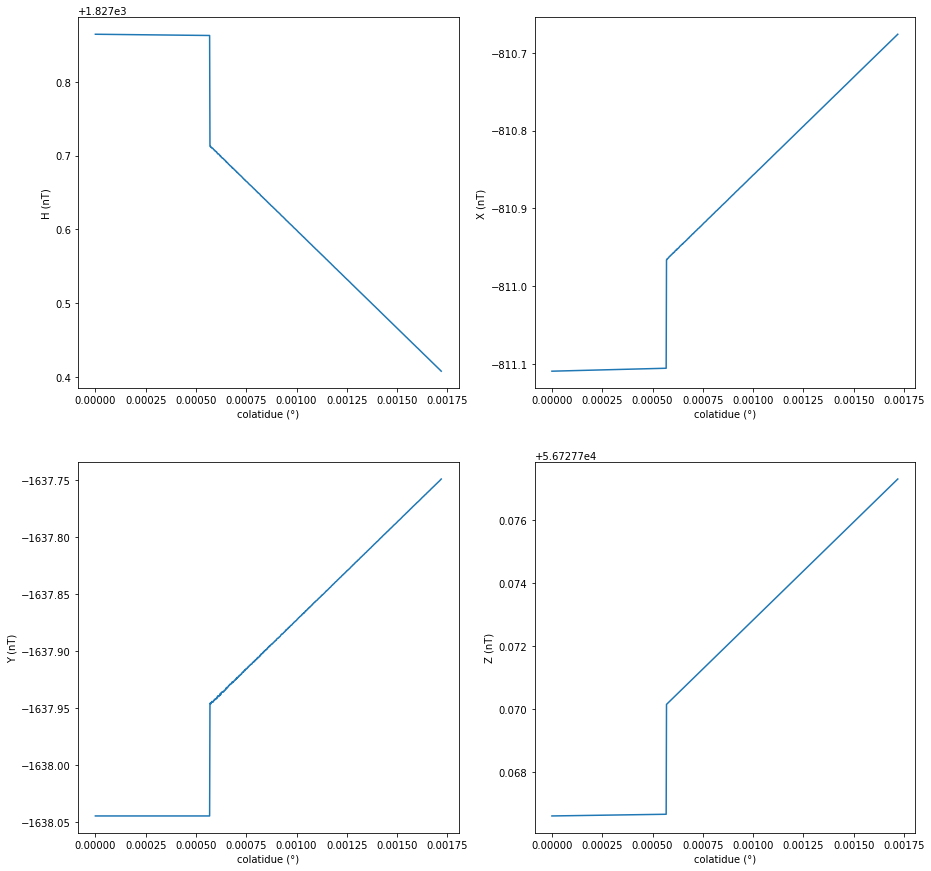

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

EPS = 1.e-5*180/np.pi
height= 0.0
longitude= 240.0
Date={"mode":"dec","year":2020.0}
H = []
X = []
Y = []
Z = []
for colatitude in np.linspace(0,3*EPS,1000):
    result = geo.B_components(longitude,colatitude,height,Date,referential="geodetic",
                                   file="WMM_2020.COF", SV=True)
    H.append(result['H'])
    X.append(result['X'])
    Y.append(result['Y'])
    Z.append(result['Z'])
    
plt.figure(figsize=(15,15))   
plt.subplot(2,2,1)
plt.plot(np.linspace(0,3*EPS,1000),H)
plt.xlabel("colatidue (°)")
plt.ylabel("H (nT)")

plt.subplot(2,2,2)
plt.plot(np.linspace(0,3*EPS,1000),X)
plt.xlabel("colatidue (°)")
plt.ylabel("X (nT)")

plt.subplot(2,2,3)
plt.plot(np.linspace(0,3*EPS,1000),Y)
plt.xlabel("colatidue (°)")
plt.ylabel("Y (nT)")

plt.subplot(2,2,4)
plt.plot(np.linspace(0,3*EPS,1000),Z)
plt.xlabel("colatidue (°)")
plt.ylabel("Z (nT)")

In [ ]:
N=12

theta=np.deg2rad(0)
d_theta=1.e-5
M0,Mp0=lpmn(N,N,np.cos(theta))
M1,Mp1=lpmn(N,N,np.cos(theta+d_theta))
Mp0=Mp0*(-1)*np.sin(theta) 
Mp0num=(M1-M0)/d_theta
print(Mp0num[1,1:])
print(Mp0[0,1:])

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>